<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting*, *random forest*.
* Redes Neuronales Convolucionales vs *Feed Forward*
* Aprendizaje no supervisado: *hidden models*
* Aprendizaje sobre secuencias
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 21 de Diciembre (11:55 hrs)
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Calidad de un vino  
[2.](#segundo) Redes Convolucionales sobre imágenes  
[3.](#tercero) Cadenas de Markov

<a id="primero"></a>
## 1. Calidad de un vino
---

Existen muchas variedades de vino existentes debido a los distintos gustos que tienen las personas. Del gusto se desprende la calidad que una persona le podría asignar a un vino, el cual proviene del gusto de la persona en particular, o bien, a la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difı́cil.  
Para esta actividad se trabajará con dos *datasets* asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”[[1]](#refs). Debido a temas privados solo se cuenta con las caracterı́stcas fisioquı́micas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente __[link](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)__.

Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
*quality*, tiene un dominio como valor entero 0 y 10. La forma de resolverlo será a través de **ensamblados**.

<img src="https://uploads.toptal.io/blog/image/92064/toptal-blog-image-1454584112948-fc1d35939aa1886bf30c816b3ac20e21.jpg" title="Title text" width="20%"  />


> a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.
```python
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
...#genere atributo 'tipo'
```

> b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 
```python
y = df["quality"].values #or codify
...#train and test split over df
```

> c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.


> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.
```python
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(max_depth=), n_estimators=, n_jobs=-1)
from sklearn.metrics import f1_score
y_pred = model.predict(x)
f1_score(y_true, y_pred)
```

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).
```python
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)
```

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.
```python
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
```

> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).
```python
oob_error = 1 - model.oob_score_
test_error = 1- model.score(X_test,y_test)
val_error = 1- model.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
print("Test error: ",test_error)
```

> h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

> i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.

> j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).
```python
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
...#measure f1 score
f1_score(y_test, new_predictions)
```

> k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.

> l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?


> a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [1]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_red["tipo"] = 0
df_white = pd.read_csv("winequality-white.csv",sep=";")
df_white["tipo"] = 1
df = pd.concat([df_red,df_white], axis=0)
print("Rojo:", df_red.shape)
print("Blanco:", df_white.shape)
print("Total:", df.shape)
print("Calidad máxima:", df["quality"].max())
print("Calidad mínima:", df["quality"].min())
df.head()

Rojo: (1599, 13)
Blanco: (4898, 13)
Total: (6497, 13)
Calidad máxima: 9
Calidad mínima: 3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Con la columna "tipo" agregada, el dataset se compone de 13 atributos donde la mayoría de ellos son números reales a excepción de la calidad y el tipo, los cuales son números enteros. Además, se define como tipo 0 a los vinos rojos y tipo 1 a los vinos blancos. Finalmente el dataset se compone de 6497 datos, donde 1599 son vinos rojos y 4898 son vinos blancos. 

Respecto a la calidad de los vinos, esta variable tiene como menor valor 3 y mayor valor 9 en el dataset, pero los expertos pueden calificar los vinos con 0 si es muy de mala calidad y 10 si es de la mejor calidad.

> b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 
```python
y = df["quality"].values #or codify
...#train and test split over df
```

Si tomamos como la calificación de cada vino como una clase, entonces existen 10 clases distintas de vinos dependiendo de su calidad. Como se mencionó en el apartado anterior, las clases presentes en el dataset son desde 3 hasta el 9, por lo que de primera instancia no existen ejemplos para las clases 0, 1, 2 y 10. Contando los ejemplos por clase se tiene:

In [2]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Dado el resultado anterior, notamos claramente que no existen ejemplos para las clases mencionadas anteriormente. También se puede notar que la mayor cantidad de vinos son calificados con una nota 6 y muy pocos ejemplos de vinos con calidad 9. Por lo tanto, existen más ejemplos de vinos de calidad media que vinos de calidad muy baja o muy alta. Además, como no existen ejemplos de las clases 0 y 10, el clasificar no sabrá muy bien como aprender a clasificarlos de esta forma y es muy probable que no los pueda clasificar.

Ahora, se realiza un conjunto de entrenamiento, validación y prueba con ayuda de la biblioteca sklearn. El conjunto de pruebas será de un 20% del total del dataset y el de validación será el 20% del conjunto de entrenamiento.

In [3]:
from sklearn.model_selection import train_test_split
# Se toman los valores de la calidad como salida
y = df['quality'].values
# Se elimina columna calidad
df.drop("quality",axis=1,inplace=True)

# Nos quedamos con los valores numéricos para la matriz X.
X = df.values

# Se separan los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se obtiene un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Se verifica que exista el mismo número de datos para las entradas y salidas.
print("Conjunto de entradas:")
print("Entrenamiento:", X_train.shape)
print("Validación:", X_val.shape)
print("Prueba:", X_test.shape)
print("Conjunto de salidas:")
print("Entrenamiento:", y_train.shape)
print("Validación:", y_val.shape)
print("Prueba:", y_test.shape)

Conjunto de entradas:
Entrenamiento: (4157, 12)
Validación: (1040, 12)
Prueba: (1300, 12)
Conjunto de salidas:
Entrenamiento: (4157,)
Validación: (1040,)
Prueba: (1300,)


El conjunto de validación se utilizará para poder determinar qué parámetros y modelos son más adecuados para el problema.

> c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.

Se exporta la librería tree de sklearn para generar el árbol de clasificación. Primero se entrena un árbol de clasificación con los parámetros por defecto, sin limitar el crecimiento del árbol.

In [4]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import f1_score
model = Tree() #edit the train_model function
model.set_params(criterion='gini',splitter='best')
model.fit(X_train,y_train)

print("Micro train:", f1_score(y_train, model.predict(X_train), average = "micro"))
print("Micro val:",f1_score(y_val, model.predict(X_val), average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, model.predict(X_val), average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, model.predict(X_train), average = "macro"))
print("Macro val:",f1_score(y_val, model.predict(X_val), average = "macro"))
print("SobreAjuste:",f1_score(y_train, model.predict(X_train), average = "macro") -f1_score(y_val, model.predict(X_val), average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, model.predict(X_train), average = "weighted"))
print("Weighted val:",f1_score(y_val, model.predict(X_val), average = "weighted"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "weighted") - f1_score(y_val, model.predict(X_val), average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 1.0
Micro val: 0.5557692307692308
SobreAjuste: 0.4442307692307692


Macro train: 1.0
Macro val: 0.3137906276548675
SobreAjuste: 0.6862093723451326


Weighted train: 1.0
Weighted val: 0.5535341770349524
SobreAjuste: 0.44646582296504755


Train Accuracy:  1.0
Val Accuracy:  0.5557692307692308


D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Los resultados indican claramente que existe mucho sobreajuste. El clasificador arroja 1 en con todos los average de la función F1_score con el conjunto de entrenamiento, indicando que se aprendió perfectamente este conjunto, pero con el conjunto de validación no ocurre lo mismo, este tiene un puntaje por debajo del 0.56 en todos los casos. Claro sobreajuste. Ahora, se variarán los parámetros del árbol de clasificación para reducir este sobre-ajuste.

In [5]:
model = Tree() #edit the train_model function
model.set_params(max_depth =2, criterion='gini',splitter='best')
model.fit(X_train,y_train)


print("Micro train:", f1_score(y_train, model.predict(X_train), average = "micro"))
print("Micro val:",f1_score(y_val, model.predict(X_val), average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, model.predict(X_val), average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, model.predict(X_train), average = "macro"))
print("Macro val:",f1_score(y_val, model.predict(X_val), average = "macro"))
print("SobreAjuste:",f1_score(y_train, model.predict(X_train), average = "macro") -f1_score(y_val, model.predict(X_val), average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, model.predict(X_train), average = "weighted"))
print("Weighted val:",f1_score(y_val, model.predict(X_val), average = "weighted"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "weighted") - f1_score(y_val, model.predict(X_val), average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.5280250180418571
Micro val: 0.5326923076923077
SobreAjuste: -0.004667289650450601


Macro train: 0.17027997178841328
Macro val: 0.1728093063709502
SobreAjuste: -0.0025293345825369296


Weighted train: 0.4578732039800562
Weighted val: 0.45751558658236746
SobreAjuste: 0.00035761739768874756


Train Accuracy:  0.5280250180418571
Val Accuracy:  0.5326923076923077


D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Si uno simplemente limita la profundidad del árbol a 2, ya se obtiene una mejora significativa en lo que respecta al sobre-ajuste, casi desapareciendo, pero el puntaje obtenido en todas las métricas del F1_Score sigue siendo muy inferior a 1. Se decide seguir modificando parámetros en búsqueda de la mejor opción.

In [6]:
model = Tree() #edit the train_model function
model.set_params(max_depth =5, criterion='gini')
model.fit(X_train,y_train)


print("Micro train:", f1_score(y_train, model.predict(X_train), average = "micro"))
print("Micro val:",f1_score(y_val, model.predict(X_val), average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, model.predict(X_val), average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, model.predict(X_train), average = "macro"))
print("Macro val:",f1_score(y_val, model.predict(X_val), average = "macro"))
print("SobreAjuste:",f1_score(y_train, model.predict(X_train), average = "macro") -f1_score(y_val, model.predict(X_val), average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, model.predict(X_train), average = "weighted"))
print("Weighted val:",f1_score(y_val, model.predict(X_val), average = "weighted"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "weighted") - f1_score(y_val, model.predict(X_val), average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.5667548713014193
Micro val: 0.5182692307692308
SobreAjuste: 0.04848564053218851


Macro train: 0.23235293226953832
Macro val: 0.1971820070537467
SobreAjuste: 0.035170925215791626


Weighted train: 0.5329977420887192
Weighted val: 0.4756532975485092
SobreAjuste: 0.05734444454020998


Train Accuracy:  0.5667548713014193
Val Accuracy:  0.5182692307692308


D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Modificar más los parámetros no tiene un efecto signficativo en las mejoras del sobre ajuste ni del score del modelo.

Finalmente, se prueba el último modelo con el conjunto de pruebas.

In [7]:
print("Micro train:", f1_score(y_train, model.predict(X_train), average = "micro"))
print("Micro test:",f1_score(y_test, model.predict(X_test), average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_test, model.predict(X_test), average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, model.predict(X_train), average = "macro"))
print("Macro test:",f1_score(y_test, model.predict(X_test), average = "macro"))
print("SobreAjuste:",f1_score(y_train, model.predict(X_train), average = "macro") -f1_score(y_test, model.predict(X_test), average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, model.predict(X_train), average = "weighted"))
print("Weighted test:",f1_score(y_test, model.predict(X_test), average = "weighted"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "weighted") - f1_score(y_test, model.predict(X_test), average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Test Accuracy: ", model.score(X_test,y_test))

Micro train: 0.5667548713014193
Micro test: 0.5184615384615384
SobreAjuste: 0.04829333283988091


Macro train: 0.23235293226953832
Macro test: 0.19990148854904044
SobreAjuste: 0.03245144372049788


Weighted train: 0.5329977420887192
Weighted test: 0.4831639280760655
SobreAjuste: 0.04983381401265369


Train Accuracy:  0.5667548713014193
Test Accuracy:  0.5184615384615384


D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


El resultado que se obtiene es un modelo ahora con muy poco sobreajuste pero con un score muy bajo.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.
```python
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(max_depth=), n_estimators=, n_jobs=-1)
from sklearn.metrics import f1_score
y_pred = model.predict(x)
f1_score(y_true, y_pred)
```

La técnica de Bagging se enfoca en que dada una probabilidad p mayor a 0.5 de que la máquina no se equivoque, y con esto aumentar la cantidad de máquinas, la propabilidad de que todas se equivoquen al mismo tiempo disminuye a medida que se aumenta la cantidad de máquinas. Por lo tanto, se espera que el F1-Score se mantenga igual si es que el árbol no es regularizado (ya que este mantiene un score de 1) y que en el caso del regularizado, este vaya aumentando su F1-Score. El sobreajuste debería mantener la misma proporción.

In [8]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(), n_estimators= 10, n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.9853259562184268
Micro val: 0.6153846153846154
SobreAjuste: 0.36994134083381136


Macro train: 0.988790228827152
Macro val: 0.3375064532217655
SobreAjuste: 0.6512837756053864


Weighted train: 0.985325802185705
Weighted val: 0.599678154853537
SobreAjuste: 0.38564764733216794




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.9853259562184268
Val Accuracy:  0.6153846153846154


Con un valor a 10 estimadores y un árbol sin regularizar, el sobre ajuste si se redujo, pero sigue siendo alto y su reducción fue en una leve proporción. Se destaca el score para el conjunto de validación aumentó. Ahora se probará con 100 estimadores.

In [9]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(), n_estimators= 100, n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 1.0
Micro val: 0.6625
SobreAjuste: 0.3375


Macro train: 1.0
Macro val: 0.3656319169977146
SobreAjuste: 0.6343680830022854


Weighted train: 1.0
Weighted val: 0.6452994141882675
SobreAjuste: 0.35470058581173247




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  1.0
Val Accuracy:  0.6625


Para 100 estimadores, se aumenta el score del conjunto de entrenamiento y levemente se ven variaciones en el conjunto de validación. También varía el sobre ajuste, disminuyendo insignificantemente, aunque para el valor macro este aumentó respecto al anterior. Estos resultados muestran que el sobreajuste sigue siendo un problema. Ahora se realizará un gráfico comparativo para diferente número de estimadores. Para este apartado, solo se usará el micro de F1-Score.

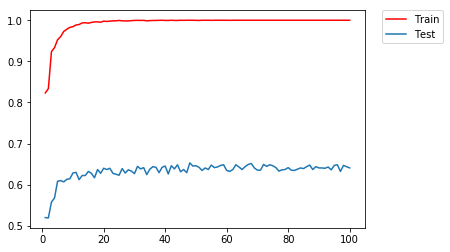

In [10]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
F1ScoreTrain = np.array([])
F1ScoreTest = np.array([])
for i in range(1, numIteraciones + 1):
    model = BaggingClassifier(base_estimator=Tree(), n_estimators= i, n_jobs=-1)
    model.fit(X_train, y_train)
    y_predTrain = model.predict(X_train)
    y_predTest = model.predict(X_test)
    F1ScoreTrain = np.append(F1ScoreTrain, f1_score(y_train, y_predTrain, average = "micro"))
    F1ScoreTest = np.append(F1ScoreTest, f1_score(y_test, y_predTest, average = "micro"))
plt.plot(t, F1ScoreTrain, 'r', label = "Train")
plt.plot(t, F1ScoreTest, label = "Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Se puede notar que el score de entrenamiento aumenta rápidamente y que con alrededor de 20 estimadores logra su máximo que es 1. Para el conjunto de test, no ocurre lo mismo. En este caso tiene un comportamiento en el que el score sube y baja con pequeñas variaciones, con tendencia a ser más alto, pero luego de los 60 estimadores estas variaciones son tan leves que el aumento del puntaje es casi imperceptible. Finalmente, se puede notar que aún existe un gran sobreajuste.

Ahora, se experimentará con un árbol de clasificación regularizado junto con la técnica Bagging.

In [11]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(max_depth =5, criterion='gini'), n_estimators= 10, n_jobs=-1)
model.fit(X_train, y_train)

y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.6057252826557614
Micro val: 0.575
SobreAjuste: 0.030725282655761466


Macro train: 0.2655250131776024
Macro val: 0.24180491310308752
SobreAjuste: 0.023720100074514888


Weighted train: 0.5787364193953152
Weighted val: 0.538685454646408
SobreAjuste: 0.040050964748907125




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.6057252826557614
Val Accuracy:  0.575


Con el árbol regularizado se muestra una gran mejora en el sobreajuste, casi inexistente, lo que es muy bueno. La diferencia es que en el modelo anterior se obtenía un mayor score en el conjunto de validación de alrededor de 0.07 puntos.

In [12]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=Tree(max_depth =5, criterion='gini'), n_estimators= 100, n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.6052441664662016
Micro val: 0.5653846153846154
SobreAjuste: 0.03985955108158623


Macro train: 0.24706566484785492
Macro val: 0.22423913796438646
SobreAjuste: 0.02282652688346845


Weighted train: 0.5721831699489106
Weighted val: 0.5262436362678077
SobreAjuste: 0.04593953368110293




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.6052441664662016
Val Accuracy:  0.5653846153846154


Al aumentar los estimadores, no se percibe mejoría. De hecho, el resultado tiene más sobre ajuste que con 10 estimadores y tiene menos score en todas las métricas.

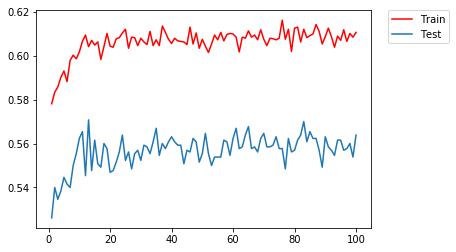

In [13]:
numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
F1ScoreTrain = np.array([])
F1ScoreTest = np.array([])
for i in range(1, numIteraciones + 1):
    model = BaggingClassifier(base_estimator=Tree(max_depth =5, criterion='gini'), n_estimators= i, n_jobs=-1)
    model.fit(X_train, y_train)
    y_predTrain = model.predict(X_train)
    y_predTest = model.predict(X_test)
    F1ScoreTrain = np.append(F1ScoreTrain, f1_score(y_train, y_predTrain, average = "micro"))
    F1ScoreTest = np.append(F1ScoreTest, f1_score(y_test, y_predTest, average = "micro"))
plt.plot(t, F1ScoreTrain, 'r', label = "Train")
plt.plot(t, F1ScoreTest, label = "Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

En este caso, se puede notar la reducción considerable del sobre ajuste, pero este aún existe. El score de prueba es menor que el árbol no regularizado

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).
```python
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)
```

Primero se utiliza AdaBoost con un árbol no regularizado. Adaboost es una técnica que da peso a los ejemplos.

In [14]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(), n_estimators= 10)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 1.0
Micro val: 0.5567307692307693
SobreAjuste: 0.44326923076923075


Macro train: 1.0
Macro val: 0.3110139019842779
SobreAjuste: 0.6889860980157221


Weighted train: 1.0
Weighted val: 0.5532610409788569
SobreAjuste: 0.44673895902114313


Train Accuracy:  1.0
Val Accuracy:  0.5567307692307693


Ahora se prueba con 100 para el no regularizado.

In [15]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(), n_estimators= 100)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 1.0
Micro val: 0.5538461538461539
SobreAjuste: 0.4461538461538461


Macro train: 1.0
Macro val: 0.3173730941628417
SobreAjuste: 0.6826269058371583


Weighted train: 1.0
Weighted val: 0.5511189727873085
SobreAjuste: 0.4488810272126915


Train Accuracy:  1.0
Val Accuracy:  0.5538461538461539


Lamentablemente, no se percibe una mejora significativa en ningún aspecto.

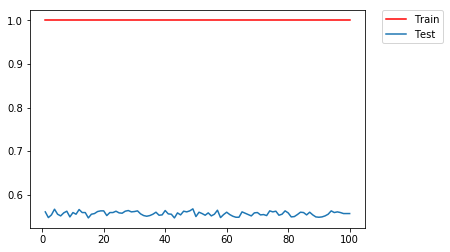

In [16]:
numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
F1ScoreTrain = np.array([])
F1ScoreTest = np.array([])
for i in range(1, numIteraciones + 1):
    model = AdaBoostClassifier(base_estimator=Tree(), n_estimators= i)
    model.fit(X_train, y_train)
    y_predTrain = model.predict(X_train)
    y_predTest = model.predict(X_test)
    F1ScoreTrain = np.append(F1ScoreTrain, f1_score(y_train, y_predTrain, average = "micro"))
    F1ScoreTest = np.append(F1ScoreTest, f1_score(y_test, y_predTest, average = "micro"))
plt.plot(t, F1ScoreTrain, 'r', label = "Train")
plt.plot(t, F1ScoreTest, label = "Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

AdaBoost no muestra mejora en el conjunto de pruebas para un árbol no regularizado.

In [63]:
model = AdaBoostClassifier(base_estimator=Tree(max_depth =5, criterion='gini'), n_estimators= 10)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.558816454173683
Micro val: 0.48365384615384616
SobreAjuste: 0.07516260801983682


Macro train: 0.5275675042459664
Macro val: 0.22383304302187396
SobreAjuste: 0.3037344612240925


Weighted train: 0.552967190741267
Weighted val: 0.4697900195786188
SobreAjuste: 0.08317717116264817


Train Accuracy:  0.558816454173683
Val Accuracy:  0.48365384615384616


D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Con un árbol regularizado, adaboost muestra mejoría en el sobre ajuste, pero el score obtenido en el conjunto de validación es muy similar al no regularizado.

In [18]:
model = AdaBoostClassifier(base_estimator=Tree(max_depth = 5, criterion='gini'), n_estimators= 100)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.6242482559538128
Micro val: 0.4913461538461538
SobreAjuste: 0.13290210210765901


Macro train: 0.7263399310674558
Macro val: 0.2589464026861516
SobreAjuste: 0.46739352838130416


Weighted train: 0.6230220715069766
Weighted val: 0.4782872326354363
SobreAjuste: 0.14473483887154032


Train Accuracy:  0.6242482559538128
Val Accuracy:  0.4913461538461538


D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Se presenta una leve mejora en el score de entrenamiento y de validación pero es casi insignificante. Aumenta el sobre ajuste.

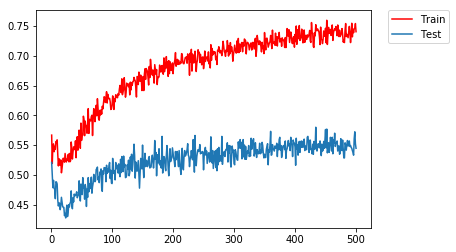

In [68]:
numIteraciones = 500
t = np.arange(1, numIteraciones + 1, 1)
F1ScoreTrain = np.array([])
F1ScoreTest = np.array([])
for i in range(1, numIteraciones + 1):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth =5, criterion='gini'), n_estimators= i)
    model.fit(X_train, y_train)
    y_predTrain = model.predict(X_train)
    y_predTest = model.predict(X_test)
    F1ScoreTrain = np.append(F1ScoreTrain, f1_score(y_train, y_predTrain, average = "micro"))
    F1ScoreTest = np.append(F1ScoreTest, f1_score(y_test, y_predTest, average = "micro"))
plt.plot(t, F1ScoreTrain, 'r', label = "Train")
plt.plot(t, F1ScoreTest, label = "Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

El comportamiento de Adaboost en el modelo regularizado es muy variante. En ambos scores comienzan a bajar para luego de 20 estimadores volver a subir. En el gráfico se aprecia que el score de ambos conjuntos va aumentando con la cantidad de estimadores, pero también lo va haciendo el sobre ajuste. Además, a simple vista se puede notar que el conjunto de entrenamiento mejora más rápido que el de prueba.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.
```python
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
```


Se utiliza la técnica de random forest para resolver el problema. Primero se utilizan 10 estimadores con un árbol no regularizado.

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 10, n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.987009862881886
Micro val: 0.6278846153846154
SobreAjuste: 0.3591252474972706


Macro train: 0.9904317235877128
Macro val: 0.34373004458762824
SobreAjuste: 0.6467016790000846


Weighted train: 0.9869993825337682
Weighted val: 0.6119083202157047
SobreAjuste: 0.37509106231806344




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.987009862881886
Val Accuracy:  0.6278846153846154


El score del conjunto de entrenamiento es alto, pero no así el de validación. Se puede ver un claro sobre ajuste.

In [21]:
model = RandomForestClassifier(n_estimators= 100, n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 1.0
Micro val: 0.6653846153846154
SobreAjuste: 0.33461538461538465


Macro train: 1.0
Macro val: 0.36987900962445697
SobreAjuste: 0.630120990375543


Weighted train: 1.0
Weighted val: 0.6488385653866772
SobreAjuste: 0.35116143461332283




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  1.0
Val Accuracy:  0.6653846153846154


Al aumentar las iteraciones de random forest, el resultado es muy similar a tener pocas iteraciones. El conjunto de entrenamiento recibe un score perfecto mientras que el de validación no, mostrando un obvio sobre ajuste.

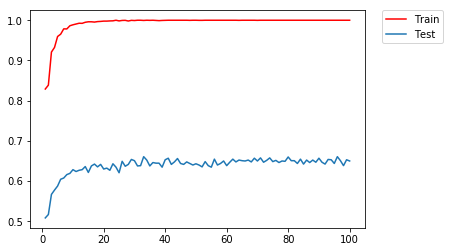

In [22]:
numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
F1ScoreTrain = np.array([])
F1ScoreTest = np.array([])
for i in range(1, numIteraciones + 1):
    model = RandomForestClassifier(n_estimators= i, n_jobs=-1)
    model.fit(X_train, y_train)
    y_predTrain = model.predict(X_train)
    y_predTest = model.predict(X_test)
    F1ScoreTrain = np.append(F1ScoreTrain, f1_score(y_train, y_predTrain, average = "micro"))
    F1ScoreTest = np.append(F1ScoreTest, f1_score(y_test, y_predTest, average = "micro"))
plt.plot(t, F1ScoreTrain, 'r', label = "Train")
plt.plot(t, F1ScoreTest, label = "Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Con el gráfico se puede notar que random forest converge rápidamente (a partir de 20 iteraciones el cambio ya no es muy drástico) y lamentablemente mantiene un gran sobre ajuste y un score bajo para el conjunto de pruebas.

In [23]:
model = RandomForestClassifier(n_estimators= 10, max_depth =5, criterion='gini', n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.5936973779167669
Micro val: 0.5663461538461538
SobreAjuste: 0.027351224070613078


Macro train: 0.23494669998954895
Macro val: 0.22228703500260577
SobreAjuste: 0.012659664986943181


Weighted train: 0.5564940402242486
Weighted val: 0.5232465313644613
SobreAjuste: 0.033247508859787334




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.5936973779167669
Val Accuracy:  0.5663461538461538


Con un árbol regularizado y para 10 estimadores, se obtiene una mejora significativa sobre el sobre ajuste, pero no en el score.

In [24]:
model = RandomForestClassifier(n_estimators= 100, max_depth =5, criterion='gini', n_jobs=-1)
model.fit(X_train, y_train)

#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.5997113302862641
Micro val: 0.5807692307692308
SobreAjuste: 0.018942099517033295


Macro train: 0.23716612584095825
Macro val: 0.22395962366647776
SobreAjuste: 0.013206502174480494


Weighted train: 0.561668919589398
Weighted val: 0.5329197864948381
SobreAjuste: 0.028749133094559953




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.5997113302862641
Val Accuracy:  0.5807692307692308


Luego, probando con 100 estimadores, se obtiene una mejora en el score de validación, acercandose al score de entrenamiento, es decir, se reduce el sobre ajuste.

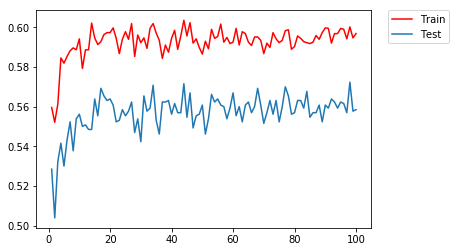

In [25]:
numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
F1ScoreTrain = np.array([])
F1ScoreTest = np.array([])
for i in range(1, numIteraciones + 1):
    model = RandomForestClassifier(n_estimators= i, max_depth =5, criterion='gini', n_jobs=-1)
    model.fit(X_train, y_train)
    y_predTrain = model.predict(X_train)
    y_predTest = model.predict(X_test)
    F1ScoreTrain = np.append(F1ScoreTrain, f1_score(y_train, y_predTrain, average = "micro"))
    F1ScoreTest = np.append(F1ScoreTest, f1_score(y_test, y_predTest, average = "micro"))
plt.plot(t, F1ScoreTrain, 'r', label = "Train")
plt.plot(t, F1ScoreTest, label = "Test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

A partir del gráfico, se puede notar que Random Forest logra aumentar el score pero no de una manera significativa. Lo más destacable es la reducción del sobre ajuste.


> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).
```python
oob_error = 1 - model.oob_score_
test_error = 1- model.score(X_test,y_test)
val_error = 1- model.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
print("Test error: ",test_error)
```




Para esta sección, se entrenan crean dos gráficos que muestran el error para las técnicas Bagging y Random Forest. Primero para Bagging con un árbol regularizado:

D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


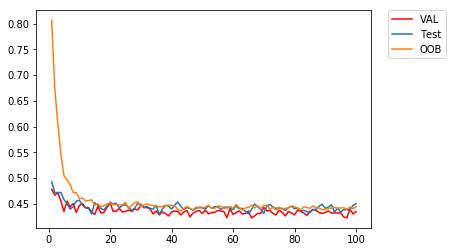

In [76]:
numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
ScoreVAL = np.array([])
ScoreTest = np.array([])
ScoreOOB = np.array([])
for i in range(1, numIteraciones + 1):
    model = BaggingClassifier(base_estimator=Tree(max_depth = 5, criterion='gini'), n_estimators= i, n_jobs=-1, oob_score = True)
    model.fit(X_train, y_train)
    ScoreVAL = np.append(ScoreVAL, 1 - model.score(X_val,y_val))
    ScoreTest = np.append(ScoreTest, 1 - model.score(X_test,y_test))
    ScoreOOB = np.append(ScoreOOB, 1 - model.oob_score_)
plt.plot(t, ScoreVAL, 'r', label = "VAL")
plt.plot(t, ScoreTest, label = "Test")
plt.plot(t, ScoreOOB, label = "OOB")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

En el gráfico se puede ver como el error de los OOB se asemeja rápidamente al error de pruebas y validación, demostrando que se puede utilizar como métrica de generalización. Ahora se realiza lo mismo pero para Random Forest:

D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

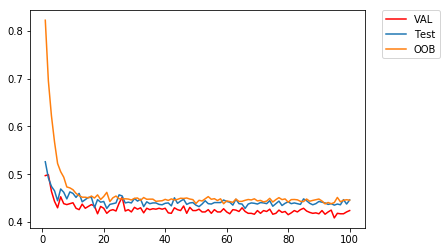

In [77]:
numIteraciones = 100
t = np.arange(1, numIteraciones + 1, 1)
ScoreVAL = np.array([])
ScoreTest = np.array([])
ScoreOOB = np.array([])
for i in range(1, numIteraciones + 1):
    model = RandomForestClassifier(n_estimators= i, max_depth =5, criterion='gini', n_jobs=-1, oob_score = True)
    model.fit(X_train, y_train)
    ScoreVAL = np.append(ScoreVAL, 1 - model.score(X_val,y_val))
    ScoreTest = np.append(ScoreTest, 1 - model.score(X_test,y_test))
    ScoreOOB = np.append(ScoreOOB, 1 - model.oob_score_)
plt.plot(t, ScoreVAL, 'r', label = "VAL")
plt.plot(t, ScoreTest, label = "Test")
plt.plot(t, ScoreOOB, label = "OOB")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Nuevamente, el error de OOB se asemeja rápidamente al error de entrenamiento. Es más, es muy similar al conjunto de pruebas, más que el conjunto de validación. Esto indica que los elementos de OOB pueden ser un buen candidato para ser utilizados como métrica de generalización.

> h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

Para esta sección se entrenarán dos máquinas: SVM y KNN para poder comparar cuál obtiene un mejor resultado:

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 350, n_jobs = -1)
model.fit(X_train, y_train)

y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, model.predict(X_train), average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.44575414962713494
Micro val: 0.4528846153846154
SobreAjuste: -0.007130465757480442


Macro train: 0.13352676310971628
Macro val: 0.1357324535918774
SobreAjuste: -0.0022056904821611267


Weighted train: 0.3676877270148409
Weighted val: 0.3716665546180824
SobreAjuste: -0.003978827603241475




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.44575414962713494
Val Accuracy:  0.4528846153846154


In [124]:
from sklearn.svm import SVC as SVM

from sklearn.neighbors import KNeighborsClassifier
classes_weights = {9: 1000, 3: 80, 8: 70, 4: 70, 7: 20, 5: 0.01, 6: 0.001}
modelSVM = SVM()
modelSVM.set_params(C=0.01,kernel='rbf') #for svm
modelSVM.fit(X_train,y_train)
y_predTrain = modelSVM.predict(X_train)
y_predVal = modelSVM.predict(X_val)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro val:",f1_score(y_val, y_predVal, average = "micro"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "micro") - f1_score(y_val, y_predVal, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro val:",f1_score(y_val, y_predVal, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_val, y_predVal, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted val:",f1_score(y_val, y_predVal, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_val, y_predVal, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Val Accuracy: ", model.score(X_val,y_val))

Micro train: 0.42915564108732257
Micro val: 0.4375
SobreAjuste: -0.00834435891267743


Macro train: 0.08579604203236589
Macro val: 0.08695652173913045
SobreAjuste: -0.0011604797067645556


Weighted train: 0.25773898794808403
Weighted val: 0.266304347826087
SobreAjuste: -0.008565359878002943




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.44575414962713494
Val Accuracy:  0.4528846153846154


KNN obtiene el mejor score en entrenamiento y validación (levemente mejor), por lo que se elige para probar con el conjunto de pruebas:

In [125]:
model = KNeighborsClassifier(n_neighbors = 350, n_jobs = -1)
model.fit(X_train, y_train)

y_predTrain = model.predict(X_train)
y_predTest = model.predict(X_test)
print("Micro train:", f1_score(y_train, y_predTrain, average = "micro"))
print("Micro test:",f1_score(y_test, y_predTest, average = "micro"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "micro") - f1_score(y_test, y_predTest, average = "micro"))
print("\n")
print("Macro train:",f1_score(y_train, y_predTrain, average = "macro"))
print("Macro test:",f1_score(y_test, y_predTest, average = "macro"))
print("SobreAjuste:",f1_score(y_train, y_predTrain, average = "macro") -f1_score(y_test, y_predTest, average = "macro"))
print("\n")
print("Weighted train:",f1_score(y_train, y_predTrain, average = "weighted"))
print("Weighted test:",f1_score(y_test, y_predTest, average = "weighted"))
print("SobreAjuste:", f1_score(y_train, y_predTrain, average = "weighted") - f1_score(y_test, y_predTest, average = "weighted"))
print("\n")
print("Train Accuracy: ", model.score(X_train,y_train))
print("Test Accuracy: ", model.score(X_test,y_test))

Micro train: 0.44575414962713494
Micro test: 0.44461538461538463
SobreAjuste: 0.001138765011750309


Macro train: 0.13352676310971628
Macro test: 0.1282474903509826
SobreAjuste: 0.0052792727587336885


Weighted train: 0.3676877270148409
Weighted test: 0.3649670854475891
SobreAjuste: 0.0027206415672518247




D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Accuracy:  0.44575414962713494
Test Accuracy:  0.44461538461538463


Sin causar sobre ajuste, este es el mejor score logrado para KNN, no siendo mejor que las técnicas anteriores. El error se puede explicar por el claro desbalance de clases. Al ser un solo estimador, solo él toma la decisión y es mucho más probable que se equivoque.


> i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.



Para resolver b, primero se utilizó un árbol de clasificación no regularizado, obteniendo que el modelo aprendía perfectamente el conjunto de entrenamiento, pero no obtenía buen puntaje en el conjunto de validación. Al no limitar el crecimiento del árbol, este se vuelve cada vez más complejo, lo que termina significando un gran sobre ajuste que se pudo ver la aplicación de este modelo no regularizado.

Luego, se entrenó un árbol regularizado limitando el crecimiento de este (profundidad). Con esto se logra disminuir la complejidad del árbol y por lo tanto el sobre ajuste. Esto sucede en la práctica pero a costo de un mayor error en el conjunto de entrenamiento. El score obtenido no es suficientemente bueno y esto puede deberse al desbalance del dataset.

A continuación, se utilizó la técnica de bagging junto con árboles sin regularizar y con regularización. Con el árbol sin regularizar, se obtiene un mejor score de validación que un solo árbol pero aún existe el problema del sobre ajuste: el conjunto de entrenamiento es completamente aprendido mientras que el score del conjunto de entrenamiento sigue siendo bajo.

Al utilizar un árbol regularizado más bagging, se obtuvo una reducción considerable del problema del sobre ajuste pero a costa del score del conjunto de entrenamiento y pruebas. El sobre ajuste se redujo bastante pero también, comparando con bagging no regularizado, el puntaje obtenido es menor en ambos conjuntos. Esta diferencia de puntaje puede mostrar que la técnica de baggin obtiene mejor score con árboles no regularizados.

Luego, AdaBoost se ocupa para un árbol no regularizado y uno regularizado. Los resultados muestran que ocupar adaboost para un árbol no regularizado no resulta apropiado ya que el sobre ajuste que muestran los resultados es muy elevado. Además, el score del conjunto de entrenamiento no es alto.

Para un árbol regularizado, Adaboost tiene un comportamiento peculiar. Para valores pequeños (alrededor de menores a 20) de estimadores, el score de ambos conjuntos se va reduciendo hasta que en un punto comienza a aumentar. Es importante notar que el sobre ajuste también comienza a aumentar con el aumento de los estimadores, por lo que el menor sobre ajuste (a partir de la gráfica) estaría entre los 50 y 100 estimadores. El score obtenido no es mejor que el de bagging.

Para Random Forest, se hizo lo mismo: se aplicó a un árbol no regularizado y a uno regularizado. Para el árbol no regularizado se obtuvo un comportamiento similar a bagging: el conjunto de entrenamiento se aprende a la perfeccción mientras que el score de prueba está alrededor de 0.6, lo que significa que existe un un gran sobre ajuste. 

Para RF con un árbol regularizado se obtiene el mejor resultado proporcional al sobre ajuste: se logra reducir significativamente el sobre ajuste y el score de ambos conjuntos es el mayor comparado con las otras técnicas cuando se usaba un árbol regularizado.

> j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).
```python
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
...#measure f1 score
f1_score(y_test, new_predictions)
```


In [134]:
from statistics import median 
def combine_predictions(predictions):
    sorted_predicciones = [sorted(x) for x in predictions]
   
    lista_predicciones_finales = [round(median(x)) for x in sorted_predicciones]
    return lista_predicciones_finales

model = BaggingClassifier(base_estimator=Tree(max_depth =5, criterion='gini'), n_estimators= 100, n_jobs=-1)
model.fit(X_train, y_train)
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)

...#measure f1 score
f1_score(y_test, new_predictions)
#y_pred = model.predict(X_val)
y_predTrain = model.predict(X_train)
y_predVal = model.predict(X_val)

ValueError: Found input variables with inconsistent numbers of samples: [1300, 100]


> k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.



> l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?

<a id="refs"></a>
## Referencias
[1] http://archive.ics.uci.edu/ml/datasets/Wine+Quality  
[2] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[3] http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html, http://colah.github.io/posts/2014-07-Understanding-Convolutions/    
[4] https://www.vision.ee.ethz.ch/datasets_extra/food-101/  
[5] Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976), *Time Series Analysis, Forecasting and Control*. Third Edition. Holden-Day. Series G.  